In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/data1.tsv', sep='\t')

In [3]:
df.columns

Index([u'custid', u'sex', u'is.employed', u'income', u'marital.stat',
       u'health.ins', u'housing.type', u'recent.move', u'num.vehicles', u'age',
       u'state.of.res'],
      dtype='object')

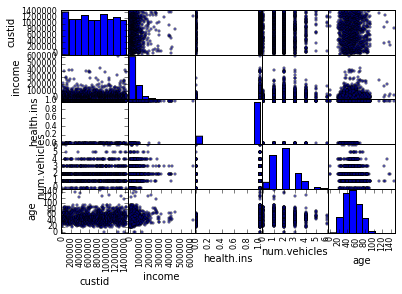

In [4]:
plt.figure(figsize=(30,30))
pd.tools.plotting.scatter_matrix(df)
plt.show()
# scatter matrix for initial exploration

In [5]:
df['state.of.res'].head()

0      Michigan
1       Florida
2       Georgia
3    New Mexico
4       Florida
Name: state.of.res, dtype: object

In [6]:
# check for descriptive statistics, missing data
df.describe()

,custid,income,health.ins,num.vehicles,age
count,1000.000000,1000.000000,1000,944.000000,1000.000000
mean,698499.702000,53504.771000,0.841,1.916314,51.699815
std,413508.277399,65478.065729,0.3658591,1.101618,18.863433
min,2068.000000,-8700.000000,False,0.000000,0.000000
25%,345666.750000,14600.000000,1,1.000000,38.000000
50%,693403.000000,35000.000000,1,2.000000,50.000000
75%,1044606.250000,67000.000000,1,2.000000,64.000000
max,1414286.000000,615000.000000,True,6.000000,146.680197


In [7]:
# num.vehicles has 1000-944 missing values, age max = 147 also looks unlikely

In [8]:
# check columns for missing data
for column in df.columns:
    print '%s has %d rows' % (column, sum(df[column].notnull()))

custid has 1000 rows
sex has 1000 rows
is.employed has 672 rows
income has 1000 rows
marital.stat has 1000 rows
health.ins has 1000 rows
housing.type has 944 rows
recent.move has 944 rows
num.vehicles has 944 rows
age has 1000 rows
state.of.res has 1000 rows


In [9]:
# A few missing values may not be a huge problem, but many might be systematic of a larger 
# problem, be it a data collection/entry error, data storage/import, etc. 
# There are a few approaches to handling missing values:

# Drop data
# Fill N/A values with:
# Average of column
# 0 or other neutral number
# Fill Forward to Fill backward (especially for timeseries)
# Interpolation
# Or just ignore them and hope your analysis/model can handle them

# This is often a subjective decision you have to make as the data scientist. There is 
# no right answer to handling missing data. And because of such the following questions 
# may not have a concrete answer.

# Which columns have missing values that it is probably ok to drop/ignore?
# Which columns have values that you cannot (should not) ignore (because there might 
# be too many)? Why might there be so many for this column(s)?
# Are there any missing/NA values that may not actually be missing but just represent 
# a different value?

In [10]:
df['is.employed'].head()
# hard to impute this column, may have to drop or impute based on model. no neutral value

0     NaN
1     NaN
2    True
3    True
4    True
Name: is.employed, dtype: object

In [11]:
df['housing.type'].head()
# hard to impute this one too

0    Homeowner free and clear
1                      Rented
2                      Rented
3       Occupied with no rent
4                      Rented
Name: housing.type, dtype: object

In [12]:
df['recent.move'].head()
# hard to impute

0    False
1     True
2     True
3    False
4     True
Name: recent.move, dtype: object

In [13]:
df['num.vehicles'].head()
# can do average or 0 based on conservativeness

0    2
1    3
2    3
3    0
4    1
Name: num.vehicles, dtype: float64

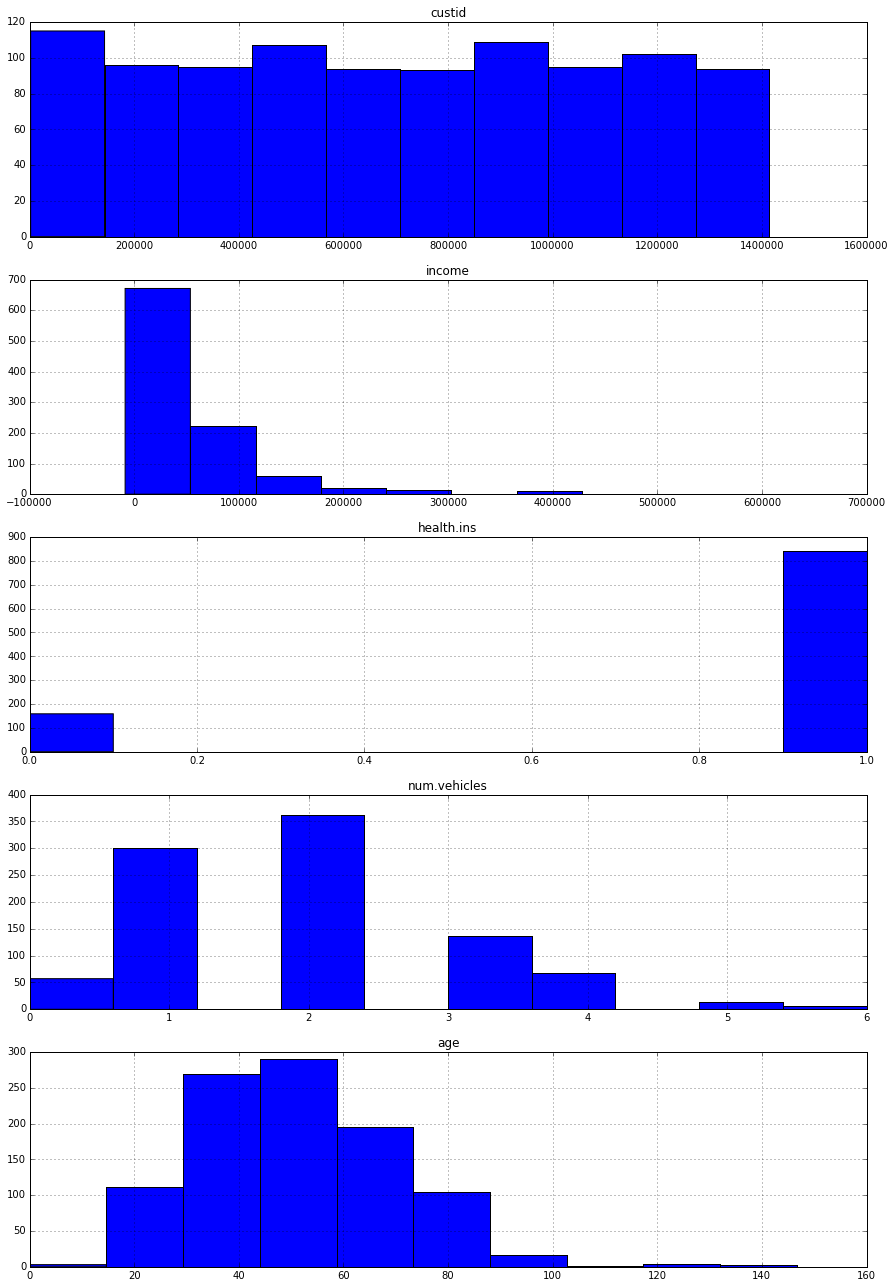

In [14]:
plt.figure(figsize=(15,50))
i = 0 # plot of numeric columns to see outliers
for column in ['custid', 'income', 'health.ins', 'num.vehicles', 'age']:
    i += 1
    plt.subplot(len(df.columns), 1, i)
    df[column].hist()
    plt.title(column) 
    plt.subplots_adjust(hspace=0.2)

In [15]:
# some outliers in age. should remove these age outliers if model (logistic regression or linear
# regression) is sensitive to data
df['age'][df['age'] > 100]

212    137.700030
266    123.061023
286    136.052160
593    146.680197
625    124.845087
752    130.401605
926    126.737284
953    113.337207
Name: age, dtype: float64

###Seaborn example

In [4]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")

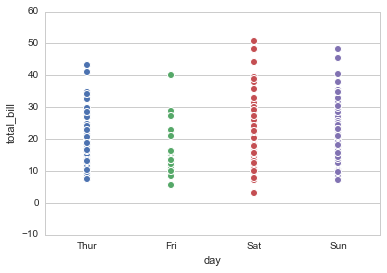

In [8]:
sns.stripplot(x="day", y="total_bill", data=tips)

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2
